### Feature Matching

How can we match detected features from one image to another? Feature matching involves comparing key attributes in different images to find similarities. Feature matching is useful in many computer vision applications, including scene understanding, image stitching, object tracking, and pattern recognition.

Brute-Force Search
Imagine you have a giant box of puzzle pieces, and you’re trying to find a specific piece that fits into your puzzle. This is similar to searching for matching features in images. Instead of having any special strategy, you decide to check every piece, one by one until you find the right one. This straightforward method is a brute-force search. The advantage of brute force is its simplicity. You don’t need any special tricks – just patience. However, it can be time-consuming, especially if there are a lot of pieces to check. In the context of feature matching, this brute force approach is akin to comparing every pixel in one image to every pixel in another to see if they match. It’s exhaustive and it might take a lot of time, especially for large images.

Now that we have an intuitive idea of how brute-force matches are found, let’s dive into the algorithms. We are going to use the descriptors that we learned about in the previous chapter to find the matching features in two images

In [1]:
%pip show opencv-python

Name: opencv-python
Version: 4.6.0.66
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: 
Author-email: 
License: MIT
Location: c:\Users\lolen\anaconda3\Lib\site-packages
Requires: numpy, numpy, numpy, numpy
Required-by: deepface, imgaug, inference, inference-gpu, inference-sdk, retina-face, sports, supervision, ultralytics, unstructured-inference
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import cv2
sift = cv2.SIFT_create()

In [21]:
img1 = cv2.imread("00008.png")  # Read as grayscale
img2 = cv2.imread("00069.png")  # Read as grayscale

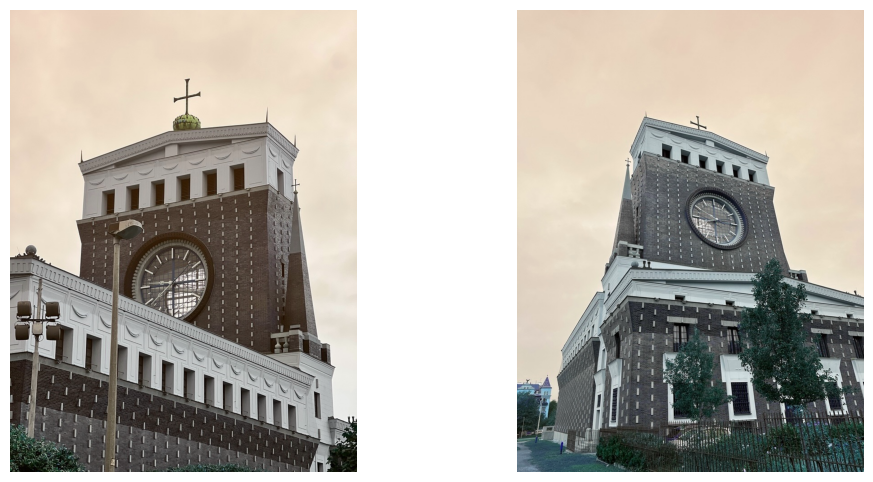

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].imshow(img1)
axes[0].axis("off")  # Hide axis

axes[1].imshow(img2)
axes[1].axis("off")  # Hide axis

plt.show()  

In [23]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [24]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [25]:
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [26]:
img3 = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

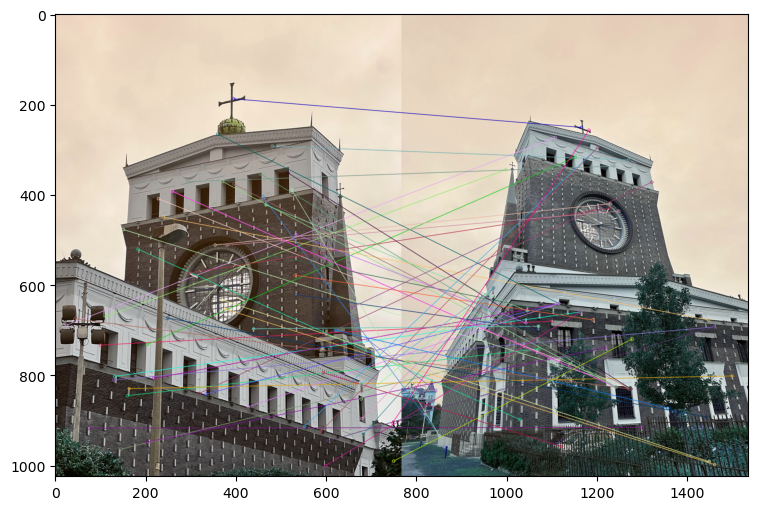

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6)) 

axes.imshow(img3)